In [62]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import  MinMaxScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
datas = load_iris()
dir(datas)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [64]:
datas.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [65]:
df = pd.DataFrame(datas.data[:,2:], columns=datas.feature_names[2:])
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


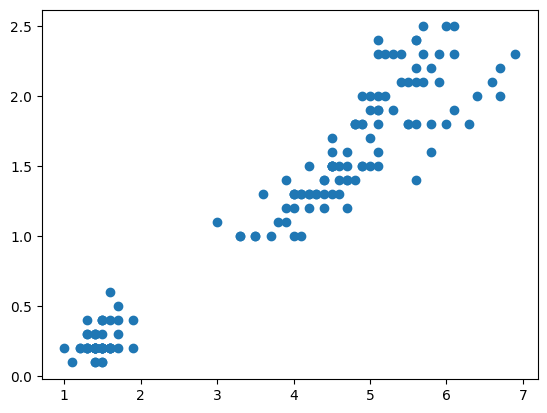

In [66]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.show()

In [67]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [68]:
y_predicted = km.fit_predict(df)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
df['cluster'] = y_predicted
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [71]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

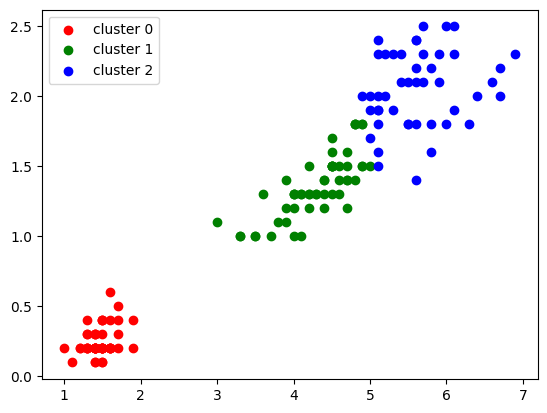

In [73]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], c='red', label="cluster 0")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], c='green', label="cluster 1")
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], c='blue', label="cluster 2")

plt.legend()
plt.show()

Though our KMeans is working perfectly by giving these 3 clusters, it might not work if the x and y axis datas have huge difference. So it's a good thing to scale your data every time before creating a model

In [74]:
scale = MinMaxScaler()
scale.fit(df[['petal length (cm)']]) # you have to give 2D array as input in both fit and tranform method
df['petal length (cm)'] = scale.transform(df[['petal length (cm)']])

scale.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scale.transform(df[['petal width (cm)']])

In [75]:
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [76]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [81]:
y_predicted = km.fit_predict(df)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [82]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

In [85]:
km.cluster_centers_

array([[ 7.83050847e-02,  6.08333333e-02, -7.77156117e-16],
       [ 5.58066541e-01,  5.24691358e-01,  1.00000000e+00],
       [ 7.84082535e-01,  8.11594203e-01,  2.00000000e+00]])

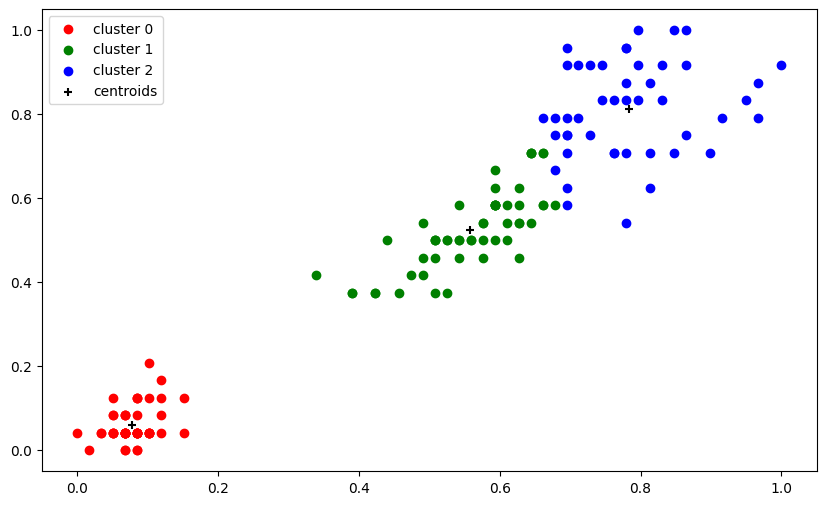

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], c='red', label="cluster 0")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], c='green', label="cluster 1")
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], c='blue', label="cluster 2")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='+', c='black', label="centroids")

plt.legend()
plt.show()

In [91]:
k_range = range(1,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

sse

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1615234094205573,
 0.8658185529284108,
 0.752813805803014,
 0.7238737234285454,
 0.508900798225046,
 0.4132667782512473,
 0.4252851405750694]

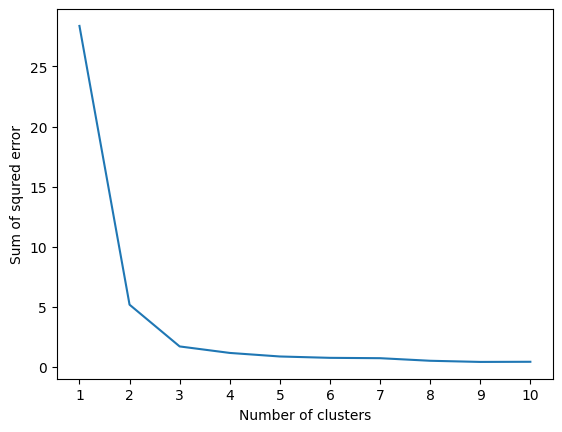

In [96]:
plt.plot(k_range, sse)
plt.xticks(k_range)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squred error')
plt.show()